In [1]:
import numpy as np 
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# Importing data

In [2]:
data_train= pd.read_csv("train_lyst1717074532669.csv")

In [3]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
data_train.shape

(14999, 9)

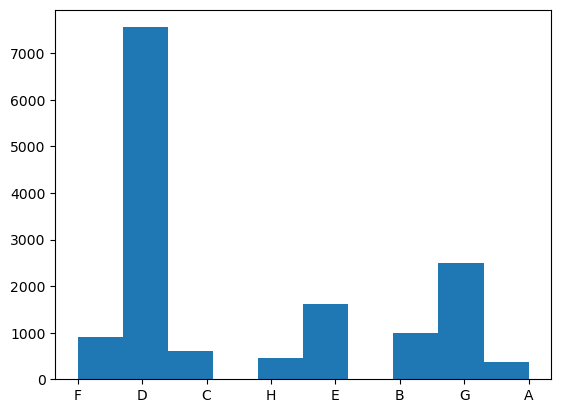

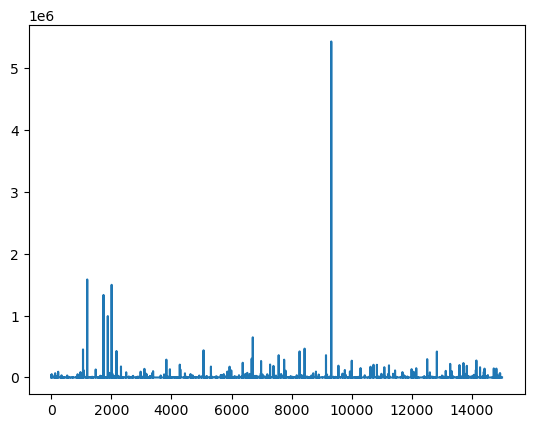

In [5]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"]< 2000000]

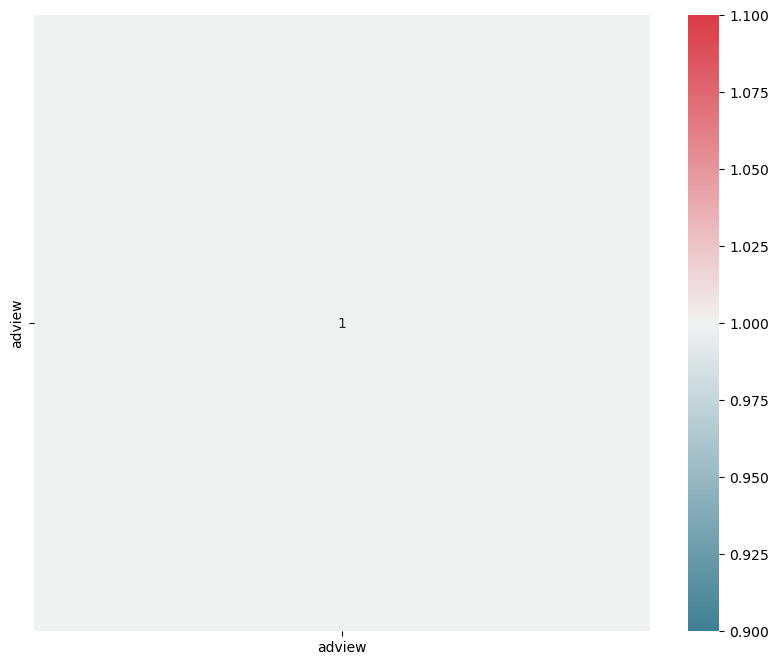

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the correlation matrix
corr = data_train.corr(numeric_only=True)

# Create the heatmap
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)

# Display the heatmap
plt.show()

In [7]:
# Removing character "F" present in data
data_train = data_train[data_train.views!="F"]
data_train = data_train[data_train.likes!="F"]
data_train = data_train[data_train.dislikes!="F"]
data_train = data_train[data_train.comment!="F"]
data_train.head()

# Assigning each category a number for Category feature
category = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "H":8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [16]:
import pandas as pd

def check1(x):
    y = x[2:]
    h = ""
    m = ""
    s = ""
    mm = ""
    P = ["H", "M", "S"]
    for i in y:
        if i not in P:
            mm += i
        else:
            if i == "H":
                h = mm
                mm = ""
            elif i == "M":
                m = mm
                mm = ""
            else:
                s = mm
                mm = ""
    if h == "":
        h = "00"
    if m == "":
        m = "00"
    if s == "":
        s = "00"
    bp = h + ":" + m + ":" + s
    return bp

# Read the dataset
train = pd.read_csv("train_lyst1717074532669.csv")
mp = train["duration"]

# Apply check1 to the duration values
time = mp.apply(check1)

def func_sec(time_string):
    h, m, s = time_string.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)

# Convert the processed time to seconds
time1 = time.apply(func_sec)

# Assign the converted duration back to the DataFrame
train["duration"] = time1

# Display the head of the DataFrame
print(train.head())


       vidid  adview    views likes dislikes comment   published  duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14       457   
1  VID_14135       2     1707    56        2       6  2016-10-01       570   
2   VID_2187       1     2023    25        0       2  2016-07-02       136   
3  VID_23096       6   620860   777      161     153  2016-07-27       262   
4  VID_10175       1      666     1        0       0  2016-06-29        31   

  category  
0        F  
1        D  
2        C  
3        H  
4        D  


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Read the dataset
data_train = pd.read_csv("train_lyst1717074532669.csv")

# Convert values to integers for views, likes, comments, dislikes, and adview, handling non-numeric values
data_train["views"] = pd.to_numeric(data_train["views"], errors='coerce')
data_train["comment"] = pd.to_numeric(data_train["comment"], errors='coerce')
data_train["likes"] = pd.to_numeric(data_train["likes"], errors='coerce')
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"], errors='coerce')
data_train["adview"] = pd.to_numeric(data_train["adview"], errors='coerce')

# Fill NaN values with 0 or another appropriate value
data_train.fillna(0, inplace=True)

# Function to convert duration to HH:MM:SS
def check1(x):
    y = x[2:]
    h = ""
    m = ""
    s = ""
    mm = ""
    P = ["H", "M", "S"]
    for i in y:
        if i not in P:
            mm += i
        else:
            if i == "H":
                h = mm
                mm = ""
            elif i == "M":
                m = mm
                mm = ""
            else:
                s = mm
                mm = ""
    if h == "":
        h = "00"
    if m == "":
        m = "00"
    if s == "":
        s = "00"
    bp = h + ":" + m + ":" + s
    return bp

# Apply check1 to the duration values
mp = data_train["duration"]
time = mp.apply(check1)

# Function to convert time to seconds
def func_sec(time_string):
    h, m, s = time_string.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)

# Convert the processed time to seconds
time1 = time.apply(func_sec)
data_train["duration"] = time1

# Encoding features like Category, Vidid, and Published
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])

# Split Data
Y_train = pd.DataFrame(data=data_train["category"].values, columns=["category"])
data_train = data_train.drop(["adview", "vidid"], axis=1, errors='ignore')

# Check data types of columns
print(data_train.dtypes)

# Ensure only numeric columns are passed to the scaler
numeric_columns = data_train.select_dtypes(include=['number']).columns
data_train = data_train[numeric_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

# Normalize Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_train.mean())

views        float64
likes        float64
dislikes     float64
comment      float64
published      int32
duration       int64
category      object
dtype: object
(11999, 6)
0.11798118337259474


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import metrics
from sklearn import linear_model
from sklearn.svm import SVR

# Read the dataset
data_train = pd.read_csv("train_lyst1717074532669.csv")

# Convert values to integers for views, likes, comments, dislikes, and adview, handling non-numeric values
data_train["views"] = pd.to_numeric(data_train["views"], errors='coerce')
data_train["comment"] = pd.to_numeric(data_train["comment"], errors='coerce')
data_train["likes"] = pd.to_numeric(data_train["likes"], errors='coerce')
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"], errors='coerce')
data_train["adview"] = pd.to_numeric(data_train["adview"], errors='coerce')

# Function to convert duration to HH:MM:SS
def check1(x):
    y = x[2:]
    h, m, s, mm = "", "", "", ""
    P = ["H", "M", "S"]
    for i in y:
        if i not in P:
            mm += i
        else:
            if i == "H":
                h = mm
                mm = ""
            elif i == "M":
                m = mm
                mm = ""
            else:
                s = mm
                mm = ""
    h = h or "00"
    m = m or "00"
    s = s or "00"
    return f"{h}:{m}:{s}"

# Apply check1 to the duration values
mp = data_train["duration"]
time = mp.apply(check1)

# Function to convert time to seconds
def func_sec(time_string):
    h, m, s = time_string.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)

# Convert the processed time to seconds
time1 = time.apply(func_sec)
data_train["duration"] = time1

# Encoding features like Category, Vidid, and Published
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])

# Ensure the target column is numeric
data_train["category"] = pd.to_numeric(data_train["category"], errors='coerce')

# Fill NaN values with 0 or another appropriate value
data_train.fillna(0, inplace=True)

# Split Data
Y_train = pd.DataFrame(data=data_train["category"].values, columns=["category"])
data_train = data_train.drop(["adview", "vidid"], axis=1, errors='ignore')

# Check data types of columns
print(data_train.dtypes)

# Ensure only numeric columns are passed to the scaler
numeric_columns = data_train.select_dtypes(include=['number']).columns
data_train = data_train[numeric_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

# Normalize Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_train.mean())

# Define the error printing function
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, prediction))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test, prediction))
    print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Linear Regression
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

# Support Vector Regressor
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train.values.ravel())
print_error(X_test, y_test, supportvector_regressor)


views        float64
likes        float64
dislikes     float64
comment      float64
published      int32
duration       int64
category     float64
dtype: object
(11999, 7)
0.1011267286050812
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import metrics
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read the dataset
data_train = pd.read_csv("train_lyst1717074532669.csv")


# Encoding features like Category, Vidid, and Published
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])

# Ensure the target column is numeric
data_train["category"] = pd.to_numeric(data_train["category"], errors='coerce')

# Fill NaN values with 0 or another appropriate value
data_train.fillna(0, inplace=True)

# Split Data
Y_train = pd.DataFrame(data=data_train["category"].values, columns=["category"])
data_train = data_train.drop(["adview", "vidid"], axis=1, errors='ignore')

# Check data types of columns
print(data_train.dtypes)

# Ensure only numeric columns are passed to the scaler
numeric_columns = data_train.select_dtypes(include=['number']).columns
data_train = data_train[numeric_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

# Normalize Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_train.mean())

# Define the error printing function
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, prediction))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test, prediction))
    print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Linear Regression
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print("Linear Regression:")
print_error(X_test, y_test, linear_regression)

# Support Vector Regressor
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train.values.ravel())
print("Support Vector Regressor:")
print_error(X_test, y_test, supportvector_regressor)

# Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train, y_train)
print("Decision Tree Regressor:")
print_error(X_test, y_test, decision_tree_regressor)

# Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train, y_train.values.ravel())
print("Random Forest Regressor:")
print_error(X_test, y_test, random_forest_regressor)


views         object
likes         object
dislikes      object
comment       object
published      int32
duration      object
category     float64
dtype: object
(11999, 2)
0.32638598639334543
Linear Regression:
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Support Vector Regressor:
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Decision Tree Regressor:
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Random Forest Regressor:
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import metrics
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read the dataset
data_train = pd.read_csv("train_lyst1717074532669.csv")

# Convert values to integers for views, likes, comments, dislikes, and adview, handling non-numeric values
data_train["views"] = pd.to_numeric(data_train["views"], errors='coerce')
data_train["comment"] = pd.to_numeric(data_train["comment"], errors='coerce')
data_train["likes"] = pd.to_numeric(data_train["likes"], errors='coerce')
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"], errors='coerce')
data_train["adview"] = pd.to_numeric(data_train["adview"], errors='coerce')

# Function to convert duration to HH:MM:SS
def check1(x):
    y = x[2:]
    h, m, s, mm = "", "", "", ""
    P = ["H", "M", "S"]
    for i in y:
        if i not in P:
            mm += i
        else:
            if i == "H":
                h = mm
                mm = ""
            elif i == "M":
                m = mm
                mm = ""
            else:
                s = mm
                mm = ""
    h = h or "00"
    m = m or "00"
    s = s or "00"
    return f"{h}:{m}:{s}"

# Apply check1 to the duration values
mp = data_train["duration"]
time = mp.apply(check1)

# Function to convert time to seconds
def func_sec(time_string):
    h, m, s = time_string.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)

# Convert the processed time to seconds
time1 = time.apply(func_sec)
data_train["duration"] = time1

# Encoding features like Category, Vidid, and Published
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])

# Ensure the target column is numeric
data_train["category"] = pd.to_numeric(data_train["category"], errors='coerce')

# Fill NaN values with 0 or another appropriate value
data_train.fillna(0, inplace=True)

# Split Data
Y_train = pd.DataFrame(data=data_train["category"].values, columns=["category"])
data_train = data_train.drop(["adview", "vidid"], axis=1, errors='ignore')

# Check data types of columns
print(data_train.dtypes)

# Ensure only numeric columns are passed to the scaler
numeric_columns = data_train.select_dtypes(include=['number']).columns
data_train = data_train[numeric_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

# Normalize Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_train.mean())

# Define the error printing function
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, prediction))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test, prediction))
    print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Linear Regression
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print("Linear Regression:")
print_error(X_test, y_test, linear_regression)

# Support Vector Regressor
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train.values.ravel())
print("Support Vector Regressor:")
print_error(X_test, y_test, supportvector_regressor)

# Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train, y_train)
print("Decision Tree Regressor:")
print_error(X_test, y_test, decision_tree_regressor)

# Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train, y_train.values.ravel())
print("Random Forest Regressor:")
print_error(X_test, y_test, random_forest_regressor)


views        float64
likes        float64
dislikes     float64
comment      float64
published      int32
duration       int64
category     float64
dtype: object
(11999, 7)
0.1011267286050812
Linear Regression:
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Support Vector Regressor:
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Decision Tree Regressor:
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Random Forest Regressor:
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import metrics
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Read the dataset
data_train = pd.read_csv("train_lyst1717074532669.csv")

# Convert values to integers for views, likes, comments, dislikes, and adview, handling non-numeric values
data_train["views"] = pd.to_numeric(data_train["views"], errors='coerce')
data_train["comment"] = pd.to_numeric(data_train["comment"], errors='coerce')
data_train["likes"] = pd.to_numeric(data_train["likes"], errors='coerce')
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"], errors='coerce')
data_train["adview"] = pd.to_numeric(data_train["adview"], errors='coerce')

# Encoding features like Category, Vidid, and Published
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])

# Ensure the target column is numeric
data_train["category"] = pd.to_numeric(data_train["category"], errors='coerce')

# Fill NaN values with 0 or another appropriate value
data_train.fillna(0, inplace=True)

# Split Data
Y_train = pd.DataFrame(data=data_train["category"].values, columns=["category"])
data_train = data_train.drop(["adview", "vidid"], axis=1, errors='ignore')

# Ensure only numeric columns are passed to the scaler
numeric_columns = data_train.select_dtypes(include=['number']).columns
data_train = data_train[numeric_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

# Normalize Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Load the best model
best_model = load_model('best_model.keras')

# Evaluate the model
print("Evaluate on test data:")
test_loss, test_mae, test_mse = best_model.evaluate(X_test, y_test, verbose=2)
print(f"Test Mean Absolute Error: {test_mae}")
print(f"Test Mean Squared Error: {test_mse}")

# Predict on test data
predictions = best_model.predict(X_test)

# Save the model
best_model.save('best_model.keras')
print("Model saved successfully.")


D:\navanatak\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
295/300 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1154e-04 - mae: 0.0099 - mse: 3.1154e-04
Epoch 1: val_loss improved from inf to 0.00000, saving model to best_model.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 3.0720e-04 - mae: 0.0098 - mse: 3.0720e-04 - val_loss: 1.5440e-06 - val_mae: 0.0012 - val_mse: 1.5440e-06
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5945e-06 - mae: 0.0017 - mse: 6.5945e-06
Epoch 2: val_loss improved from 0.00000 to 0.00000, saving model to best_model.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 6.5889e-06 - mae: 0.0017 - mse: 6.5889e-06 - val_loss: 5.7498e-08 - val_mae: 1.7428e-04 - val_mse: 5.7498e-08
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5331e-06 - mae: 9.0134e-04 - mse: 2.5331e-06
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to best_model.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.5313e-06 - mae: 9.0098e-04 - mse: 2.5313e-06 - val_loss: 9.9636e-09 -